In [1]:
%load_ext autoreload
%autoreload 2
import sklearn
from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

from isometry_pursuit.experiment import run_resampling_experiment
from isometry_pursuit.plot import box_plot


import random

np.random.seed(1234)
random.seed(1234)

In [2]:
# vary C show results
wine = load_wine()
P_wine, _ = wine['data'].shape
D_wine = 13
print(f"D_wine = {D_wine}")
print(f"features = {wine['feature_names']}")
print(f"P_wine = {P_wine}")

wine_df = pd.DataFrame(data= wine['data'][:,:D_wine], columns = wine['feature_names'][:D_wine]) # label with class names?
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

iris = load_iris()
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print(f"features = {iris['feature_names']}")
print("P_iris", P_iris)
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names'])

scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])

D_wine = 13
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
P_wine = 178
D_iris 4
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
P_iris 150


In [3]:
print("these are standarized to square root P")
print(np.linalg.norm(iris_standardized, axis = 0))
print(np.linalg.norm(wine_standardized, axis = 0))

these are standarized to square root P
[12.24744871 12.24744871 12.24744871 12.24744871]
[13.34166406 13.34166406 13.34166406 13.34166406 13.34166406 13.34166406
 13.34166406 13.34166406 13.34166406 13.34166406 13.34166406 13.34166406
 13.34166406]


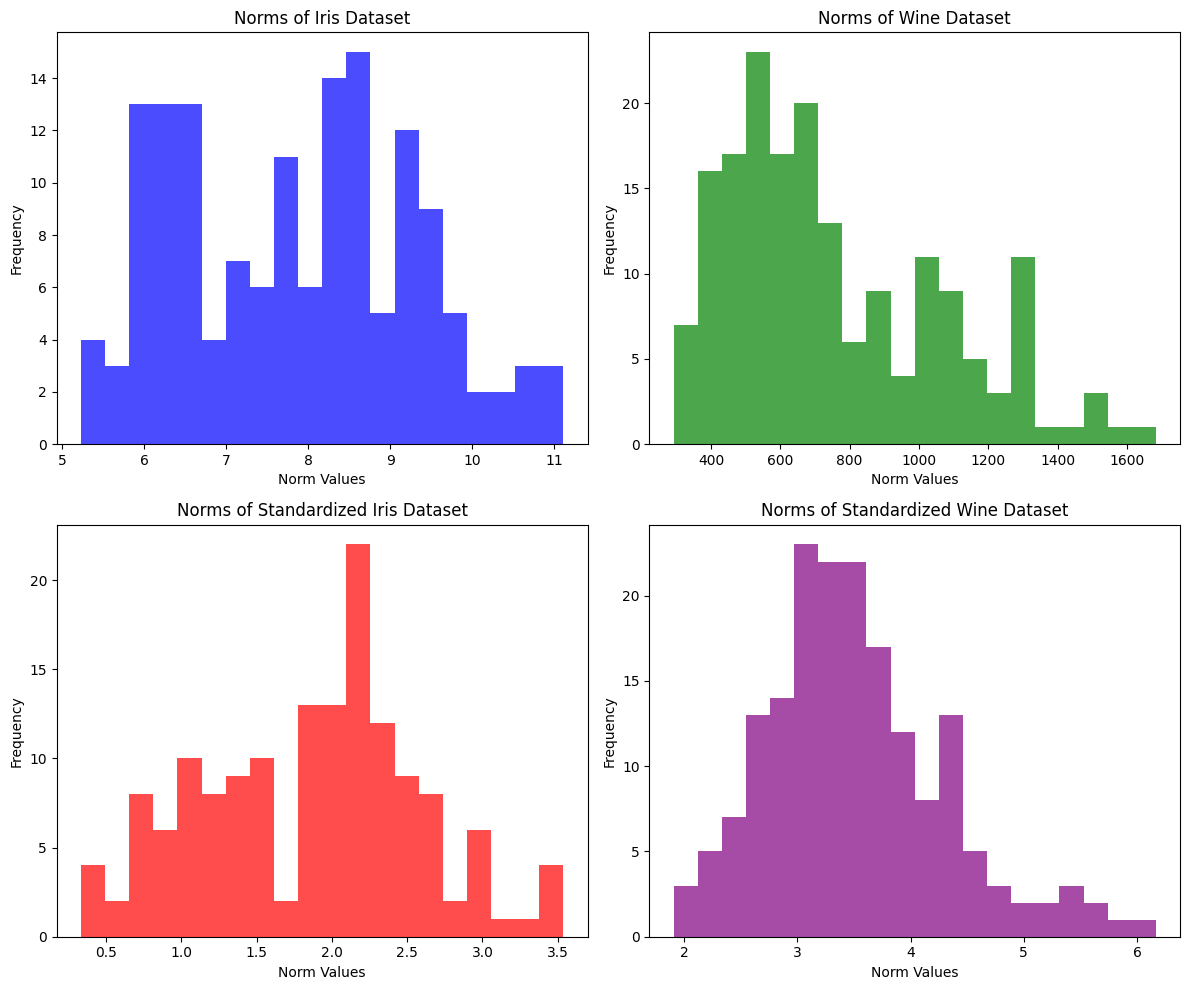

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Iris dataset
axs[0, 0].hist(np.linalg.norm(iris_df, axis=1), bins=20, alpha=0.7, color='blue')
axs[0, 0].set_title("Norms of Iris Dataset")

# Plot for Wine dataset
axs[0, 1].hist(np.linalg.norm(wine_df, axis=1), bins=20, alpha=0.7, color='green')
axs[0, 1].set_title("Norms of Wine Dataset")

# Plot for Standardized Iris dataset
axs[1, 0].hist(np.linalg.norm(iris_standardized, axis=1), bins=20, alpha=0.7, color='red')
axs[1, 0].set_title("Norms of Standardized Iris Dataset")

# Plot for Standardized Wine dataset
axs[1, 1].hist(np.linalg.norm(wine_standardized, axis=1), bins=20, alpha=0.7, color='purple')
axs[1, 1].set_title("Norms of Standardized Wine Dataset")

# Adding overall labels and adjusting layout
for ax in axs.flat:
    ax.set_xlabel('Norm Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
# print("Analyzing two stage effectiveness against brute")
# compute_brute = True
# power = 1.
# R = 1
# frac = .1
# name = "iris_standardized"
# results = run_resampling_experiment(iris_standardized, D_iris, frac = frac, R = R, power = power, compute_brute = compute_brute)
# box_plot(results['Losses'],
#          results['Two-Stage Losses'],
#          D_iris,
#          xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'],
#          ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
#          filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')


# box_plot(results['Brute Losses'],
#          results['Greedy Multitask Norms (Two-Stage)'],
#          D_iris,
#          xlabels = [r'$\widehat S_{B_{\|\|_{1,2}}}$', r'$\widehat S_{B_{\|\|_{1,2}} \circ IP}$'],
#          ylabel = r'$\|(X_{.\widehat {S}}^C)\|_{1,2} - D$',
#          filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_group_lasso_losses')

# name = "wine_standardized"
# results = run_resampling_experiment(wine_standardized, D_wine, frac = frac, R = R, power = power, compute_brute = compute_brute)
# box_plot(results['Losses'],
#          results['Two-Stage Losses'],
#          D_wine,
#          xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'],
#          ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
#          filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')

# box_plot(results['Brute Losses'],
#          results['Greedy Multitask Norms (Two-Stage)'],
#          D_wine,
#          xlabels = [r'$\widehat S_{B_{\|\|_{1,2}}}$', r'$\widehat S_{B_{\|\|_{1,2}} \circ IP}$'],
#          ylabel = r'$\|(X_{.\widehat {S}}^C)\|_{1,2} - D$',
#          filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_group_lasso_losses')

In [33]:
# TODO (Sam): rename TS, IP
print("Analyzing power effect")
R = 10
compute_brute = False
frac = .5
powers = [.33, 1.]
results = {}
names = ["iris_standardized", "iris_df", "wine_df", "wine_standardized"]
D_wine = 6
for power in powers:
    try:
        name = "iris_standardized"
        print(name)
        results[(name, power)] = run_resampling_experiment(iris_standardized, D_iris, frac = frac, R = R, power = power, compute_brute = compute_brute)
    except:
        pass
    try:
        name = "iris_df"
        print(name)
        results[(name, power)] = run_resampling_experiment(iris_df, D_iris, frac = frac, R = R, power = power, compute_brute = compute_brute)
    except:
        pass
    try:
        name = "wine_df"
        print(name)
        results[(name, power)] = run_resampling_experiment(wine_df, D_wine, frac = frac, R = R, power = power, compute_brute = compute_brute)
    except:
        pass
    try:
        name = "wine_standardized"
        print(name)
        results[(name, power)] = run_resampling_experiment(wine_standardized, D_wine, frac = frac, R = R, power = power, compute_brute = compute_brute)
    except:
        pass

Analyzing power effect
iris_standardized
Data subsampled dimension (4, 75)


/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Brute force complexity 35 from D=4 and nbp=7
Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 20397.48it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 20195.44it/s]


Data subsampled dimension (4, 75)
Brute force complexity 35 from D=4 and nbp=7
Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 24373.34it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 14001.01it/s]

Data subsampled dimension (4, 75)


Brute force complexity 35 from D=4 and nbp=7
Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 22844.79it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 15638.72it/s]

Data subsampled dimension (4, 75)


Brute force complexity 35 from D=4 and nbp=7
Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 23692.81it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 16487.04it/s]

Data subsampled dimension (4, 75)
Failure:interrupted
iris_df
Data subsampled dimension (4, 75)


Failure:interrupted
wine_df
Data subsampled dimension (6, 89)
Brute force complexity 210 from D=6 and nbp=10
Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 28649.62it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 17275.41it/s]


Data subsampled dimension (6, 89)
Brute force complexity 462 from D=6 and nbp=11
Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 18500.93it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 25144.60it/s]

Data subsampled dimension (6, 89)


Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 16712.75it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 14835.84it/s]


Data subsampled dimension (6, 89)
Brute force complexity 5005 from D=6 and nbp=15
Computing brute force solution for dictionary dimension 15 and target_dimension 6


5005it [00:00, 23994.79it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 6


5005it [00:00, 26413.96it/s]


Data subsampled dimension (6, 89)
Brute force complexity 462 from D=6 and nbp=11
Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 17375.66it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 21650.80it/s]


Data subsampled dimension (6, 89)
Brute force complexity 924 from D=6 and nbp=12
Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 17254.98it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 27238.23it/s]


Data subsampled dimension (6, 89)
Brute force complexity 210 from D=6 and nbp=10
Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 14732.61it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 19060.07it/s]


Data subsampled dimension (6, 89)
Brute force complexity 924 from D=6 and nbp=12
Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 22084.22it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 26072.96it/s]


Data subsampled dimension (6, 89)
Brute force complexity 462 from D=6 and nbp=11
Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 19958.48it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 26181.46it/s]

Data subsampled dimension (6, 89)


Brute force complexity 462 from D=6 and nbp=11
Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 18445.28it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 27851.10it/s]

wine_standardized
Data subsampled dimension (6, 89)


Brute force complexity 27132 from D=6 and nbp=19
Computing brute force solution for dictionary dimension 19 and target_dimension 6


27132it [00:01, 26686.47it/s]


Computing brute force solution for dictionary dimension 19 and target_dimension 6


27132it [00:00, 28304.61it/s]


Data subsampled dimension (6, 89)
Brute force complexity 12376 from D=6 and nbp=17
Computing brute force solution for dictionary dimension 17 and target_dimension 6


12376it [00:00, 28514.17it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 6


12376it [00:00, 30854.31it/s]


Data subsampled dimension (6, 89)
Brute force complexity 18564 from D=6 and nbp=18
Computing brute force solution for dictionary dimension 18 and target_dimension 6


18564it [00:00, 28247.79it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 6


18564it [00:00, 30796.75it/s]


Data subsampled dimension (6, 89)
Brute force complexity 38760 from D=6 and nbp=20
Computing brute force solution for dictionary dimension 20 and target_dimension 6


38760it [00:01, 28689.18it/s]


Computing brute force solution for dictionary dimension 20 and target_dimension 6


38760it [00:01, 31097.36it/s]


Data subsampled dimension (6, 89)
Brute force complexity 8008 from D=6 and nbp=16
Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 26023.08it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 28752.28it/s]


Data subsampled dimension (6, 89)
Failure:interrupted
iris_standardized
Data subsampled dimension (4, 75)
Failure:interrupted
iris_df
Data subsampled dimension (4, 75)


/Users/samsonkoelle/isometry-pursuit/isometry_pursuit/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)


Brute force complexity 15 from D=4 and nbp=6
Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12595.51it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 11405.83it/s]


Data subsampled dimension (4, 75)
Brute force complexity 35 from D=4 and nbp=7
Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 13133.00it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 21835.59it/s]

Data subsampled dimension (4, 75)
wine_df
Data subsampled dimension (6, 89)
wine_standardized
Data subsampled dimension (6, 89)


Failure:interrupted


In [37]:
# wine_test = run_resampling_experiment(wine_df, D_wine, frac = frac, R = R, power = .25, compute_brute = False)
wine_test = run_resampling_experiment(wine_standardized, D_wine, frac = .1, R = R, power = 1., compute_brute = False)

Data subsampled dimension (6, 18)
Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 20776.13it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 18233.27it/s]

Data subsampled dimension (6, 18)


Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 25323.19it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 16629.92it/s]

Data subsampled dimension (6, 18)


Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 13363.23it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 6770.47it/s]

Data subsampled dimension (6, 18)


Brute force complexity 210 from D=6 and nbp=10
Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 24993.72it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 21790.75it/s]

Data subsampled dimension (6, 18)


Brute force complexity 28 from D=6 and nbp=8
Computing brute force solution for dictionary dimension 8 and target_dimension 6


28it [00:00, 23488.10it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 6


28it [00:00, 15265.89it/s]

Data subsampled dimension (6, 18)


Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 26524.24it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 13852.38it/s]

Data subsampled dimension (6, 18)


Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 21450.32it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 19394.56it/s]

Data subsampled dimension (6, 18)


Brute force complexity 210 from D=6 and nbp=10
Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 24887.09it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 6


210it [00:00, 17581.97it/s]

Data subsampled dimension (6, 18)


Brute force complexity 84 from D=6 and nbp=9
Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 8057.67it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 6


84it [00:00, 16723.07it/s]

Data subsampled dimension (6, 18)


Brute force complexity 7 from D=6 and nbp=7
Computing brute force solution for dictionary dimension 7 and target_dimension 6


7it [00:00, 15793.51it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 6


7it [00:00, 8673.60it/s]


In [38]:
box_plot(wine_test['Losses'],
         wine_test['Two-Stage Losses'],
         D_wine,
         xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = f'/Users/samsonkoelle/isometry-pursuit/figures/wine_test_isometry_losses')

In [39]:
wine_test['Losses']

0    13.228550
1     9.722719
2    13.089691
3    10.377749
4    11.580229
5    10.347144
6    10.208336
7     9.118092
8    10.916318
9     9.974324
Name: Losses, dtype: float64

In [31]:
D_wine

6

In [20]:
for power in powers:
    for name in names:
        if "wine" in name:
            D = D_wine
        else:
            D = D_iris
        try:
            
            box_plot(results[(name, power)]['Losses'],
                     results[(name, power)]['Two-Stage Losses'],
                     D,
                     xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'],
                     ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
                     filename = f'/Users/samsonkoelle/isometry-pursuit/figures/{name}_{str(frac).replace(".","p")}_{str(power).replace(".","p")}_isometry_losses')
            print(name, power)
        except:
            pass

iris_standardized 0.33
iris_df 0.33
wine_df 0.33
wine_standardized 0.33
iris_standardized 1.0
iris_df 1.0
wine_standardized 1.0


In [8]:
print(np.mean(losses))
print(np.std(losses))  # Standard deviation
print(np.mean(two_stage_losses))
print(np.std(two_stage_losses))  # Standard deviation
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

5.734369034010522
0.18991729870508334
5.618834928412273
0.12878299514658612
11.48
1.389100428334827
